In [166]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [167]:
#set your own directory
os.chdir('D:/xiaohongshu')
font_properties = FontProperties(fname='SimHei.ttf', size=12)
df = pd.read_csv('小红书数据_Techlent数据科学社区.csv')
df1 = df[df['观看量'].notna()]
df1['观看量'].isnull().sum()

0

In [168]:
df1.head()

,笔记名称,笔记链接,发布日期,观看量,评论数,点赞量,分享数,收藏数,直接涨粉数,标签,类别
0,Marketing Data Scientist 必须掌握的知识,https://www.xiaohongshu.com/explore/65361e7800...,10/23/2023,612.0,0.0,3.0,0.0,2.0,3.0,#数据科学\n #DS #marketing #datascience #北美data求职 ...,干货分享
1,休斯顿数据科学家线下交流会,https://www.xiaohongshu.com/explore/6536803400...,10/23/2023,2102.0,5.0,19.0,10.0,7.0,14.0,#休斯顿生活\n #休斯顿大学 #休斯顿 #Rice大学 #休斯顿留学生 #数据科学 #数...,线下交流会
2,备战春招必看！数据科学一站式训练营推荐,https://www.xiaohongshu.com/explore/65376e5000...,10/24/2023,511.0,0.0,1.0,0.0,0.0,0.0,#数据科学 #春招 #留学生求职 #北美春招#北美data求职 #DS #data #dat...,报名截止日期
3,入职美国银行业 DS 半年，我都学到了什么？,https://www.xiaohongshu.com/explore/6538d29300...,10/25/2023,871.0,1.0,3.0,0.0,5.0,1.0,#今日份工作小结 #DS #数据科学 #北美data求职 #北美留学 #银行 #银行工作 #...,经验分享
4,DS 线下交流会！休斯顿地区的同学看过来！,https://www.xiaohongshu.com/explore/653b5a5600...,10/27/2023,542.0,0.0,0.0,0.0,0.0,0.0,#休斯顿 #休斯顿生活 #休斯顿大学 #Rice大学 #数据科学 #北美data求职 #数据...,线下交流会


In [169]:
df2 = df1.groupby('类别')['观看量'].mean()

In [170]:
print(df2)

类别
其他          1008.000000
周三直播预告       467.000000
干货分享         657.562500
报名截止日期       522.222222
直播通知         537.600000
线下交流会        882.250000
经验分享         712.555556
经验分享直播预告     688.000000
课程宣传         527.750000
课程直播预告       533.000000
Name: 观看量, dtype: float64


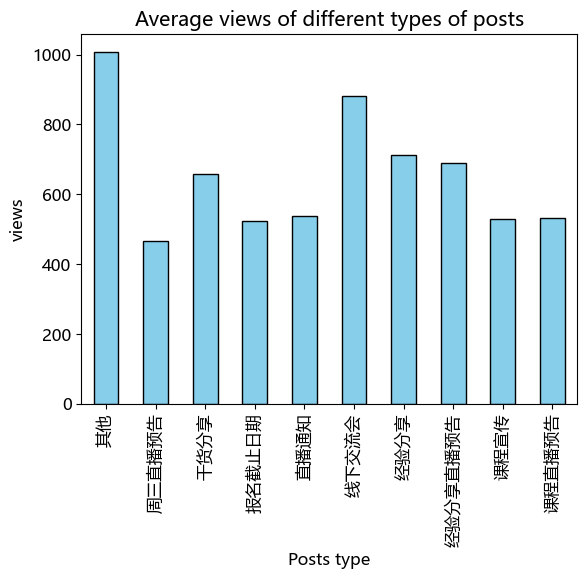

In [171]:

font = {'family': 'Microsoft YaHei', 'size': 12}
plt.rc('font', **font)
df2.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average views of different types of posts')
plt.xlabel('Posts type')
plt.ylabel('views')
plt.show()

In [172]:
df1[df1['类别'] == '其他']

,笔记名称,笔记链接,发布日期,观看量,评论数,点赞量,分享数,收藏数,直接涨粉数,标签,类别
41,美国休斯顿大学健康医学 DS 课题组招人啦！,https://www.xiaohongshu.com/explore/6584ee1600...,12/21/2023,1008.0,0.0,14.0,9.0,12.0,5.0,#留学申请季 #研究生申请 #留学美国 #美国留学申请 #美国留学生 #美国研究生 #美国研...,其他


In [173]:
df3 = df1[df1['类别'] != '其他']
column_means = df3[['观看量', '评论数', '点赞量', '分享数', '收藏数', '直接涨粉数']].mean()
column_means_df = pd.DataFrame(column_means).T
print(column_means_df)
outlier = df1[df1['类别'] == '其他']
outlier_stats = outlier[['观看量', '评论数', '点赞量', '分享数', '收藏数', '直接涨粉数']]

          观看量   评论数       点赞量       分享数       收藏数  直接涨粉数
0  639.890625  0.25  1.796875  0.921875  1.234375  0.875


In [174]:
compare = pd.concat([column_means_df,outlier_stats],keys=['观看量', '评论数', '点赞量', '分享数', '收藏数', '直接涨粉数'])

In [175]:
compare

,,观看量,评论数,点赞量,分享数,收藏数,直接涨粉数
观看量,0,639.890625,0.25,1.796875,0.921875,1.234375,0.875
评论数,41,1008.000000,0.00,14.000000,9.000000,12.000000,5.000


In [176]:
compare.index = ['average', 'outlier']
compare_views = compare.iloc[:,0]
compare_others = compare.iloc[:,1:]

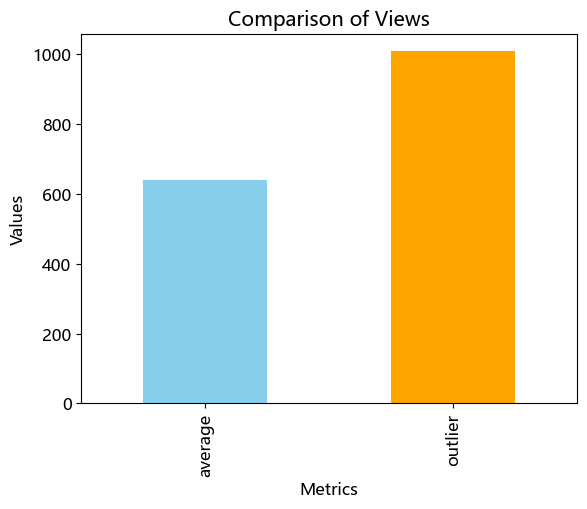

In [177]:
compare_views.T.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Comparison of Views')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

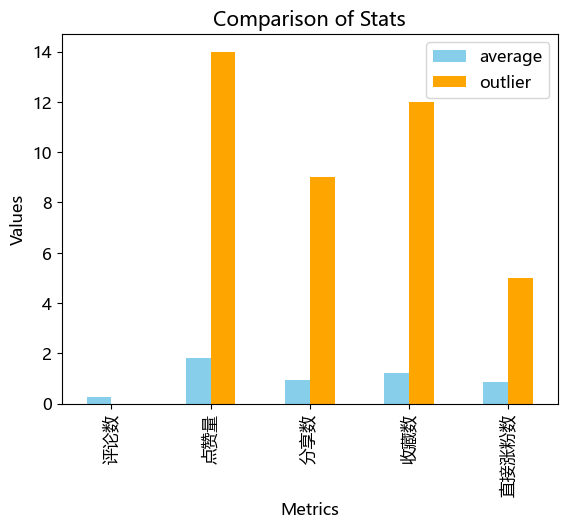

In [178]:
compare_others.T.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Comparison of Stats')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

In [179]:
df3 = df1[df1['类别'] != '其他']

In [180]:
df3

,笔记名称,笔记链接,发布日期,观看量,评论数,点赞量,分享数,收藏数,直接涨粉数,标签,类别
0,Marketing Data Scientist 必须掌握的知识,https://www.xiaohongshu.com/explore/65361e7800...,10/23/2023,612.0,0.0,3.0,0.0,2.0,3.0,#数据科学\n #DS #marketing #datascience #北美data求职 ...,干货分享
1,休斯顿数据科学家线下交流会,https://www.xiaohongshu.com/explore/6536803400...,10/23/2023,2102.0,5.0,19.0,10.0,7.0,14.0,#休斯顿生活\n #休斯顿大学 #休斯顿 #Rice大学 #休斯顿留学生 #数据科学 #数...,线下交流会
2,备战春招必看！数据科学一站式训练营推荐,https://www.xiaohongshu.com/explore/65376e5000...,10/24/2023,511.0,0.0,1.0,0.0,0.0,0.0,#数据科学 #春招 #留学生求职 #北美春招#北美data求职 #DS #data #dat...,报名截止日期
3,入职美国银行业 DS 半年，我都学到了什么？,https://www.xiaohongshu.com/explore/6538d29300...,10/25/2023,871.0,1.0,3.0,0.0,5.0,1.0,#今日份工作小结 #DS #数据科学 #北美data求职 #北美留学 #银行 #银行工作 #...,经验分享
4,DS 线下交流会！休斯顿地区的同学看过来！,https://www.xiaohongshu.com/explore/653b5a5600...,10/27/2023,542.0,0.0,0.0,0.0,0.0,0.0,#休斯顿 #休斯顿生活 #休斯顿大学 #Rice大学 #数据科学 #北美data求职 #数据...,线下交流会
...,...,...,...,...,...,...,...,...,...,...,...
60,春招在即，应届生一定要做好这些求职准备！,https://www.xiaohongshu.com/explore/65a630cf00...,01/16/2023,400.0,0.0,0.0,0.0,0.0,0.0,#应届生找工作 #应届毕业生 #应届毕业生找工作 #春招 #应届生 #应届生求职 #校招 #...,干货分享
61,直播答疑预告：北美数据科学求职,https://www.xiaohongshu.com/explore/65a73ac300...,01/16/2024,467.0,0.0,0.0,0.0,0.0,0.0,#数据科学 #数据分析求职 #北美data求职 #北美求职 #美国求职 #美国data求职 ...,周三直播预告
62,零基础友好!数据科学 Boot Camp,https://www.xiaohongshu.com/explore/65a797aa00...,01/17/2024,512.0,2.0,2.0,0.0,1.0,1.0,#数据科学 #北美data求职 #数据科学求职 #机器学习 #python学习 #DS #美...,课程宣传
63,AI 领域大佬手把手带你入门！LLM 课程推荐,https://www.xiaohongshu.com/explore/65aa268300...,01/19/2023,470.0,0.0,0.0,2.0,0.0,0.0,#LLM #大语言模型 #ai #AI #人工智能 #玩转人工智能 #chatgpt #ch...,课程宣传


In [181]:
df_mean = df3.groupby('类别')[['评论数','点赞量','分享数','收藏数','直接涨粉数']].mean()

In [182]:
df_mean

,评论数,点赞量,分享数,收藏数,直接涨粉数
类别,,,,,
周三直播预告,0.000000,0.000000,0.000000,0.000000,0.000000
干货分享,0.000000,2.500000,0.500000,2.562500,0.750000
报名截止日期,0.222222,0.666667,0.444444,0.222222,0.666667
直播通知,0.000000,0.600000,1.600000,0.200000,1.000000
线下交流会,0.875000,5.125000,2.875000,1.500000,3.000000
经验分享,0.111111,1.000000,0.333333,1.333333,0.333333
经验分享直播预告,0.000000,1.500000,1.000000,1.250000,0.750000
课程宣传,0.750000,1.000000,0.875000,0.500000,0.250000
课程直播预告,0.000000,0.500000,0.500000,0.500000,0.250000


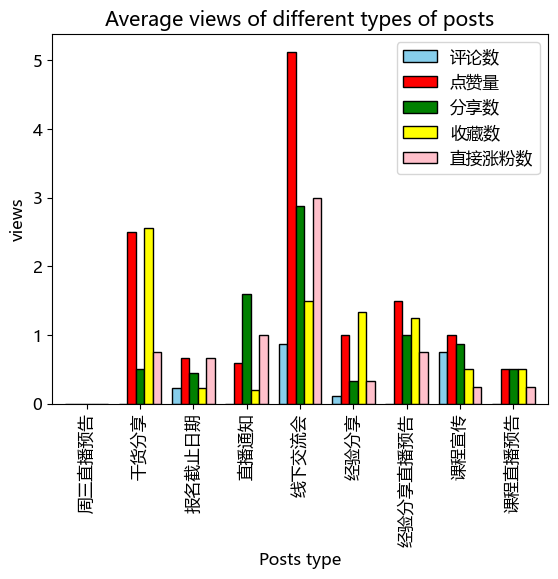

In [183]:
font = {'family': 'Microsoft YaHei', 'size': 12}
plt.rc('font', **font)
df_mean.plot(kind='bar', color=['skyblue','red','green','yellow','pink'], edgecolor='black',width = 0.8,)
plt.title('Average views of different types of posts')
plt.xlabel('Posts type')
plt.ylabel('views')
plt.show()

In [184]:
cat_count = df3['类别'].value_counts()

In [185]:
cat_count

类别
干货分享        16
报名截止日期       9
经验分享         9
线下交流会        8
课程宣传         8
直播通知         5
课程直播预告       4
经验分享直播预告     4
周三直播预告       1
Name: count, dtype: int64

In [186]:
df_mean['发布次数'] = cat_count

In [187]:
df_mean

,评论数,点赞量,分享数,收藏数,直接涨粉数,发布次数
类别,,,,,,
周三直播预告,0.000000,0.000000,0.000000,0.000000,0.000000,1
干货分享,0.000000,2.500000,0.500000,2.562500,0.750000,16
报名截止日期,0.222222,0.666667,0.444444,0.222222,0.666667,9
直播通知,0.000000,0.600000,1.600000,0.200000,1.000000,5
线下交流会,0.875000,5.125000,2.875000,1.500000,3.000000,8
经验分享,0.111111,1.000000,0.333333,1.333333,0.333333,9
经验分享直播预告,0.000000,1.500000,1.000000,1.250000,0.750000,4
课程宣传,0.750000,1.000000,0.875000,0.500000,0.250000,8
课程直播预告,0.000000,0.500000,0.500000,0.500000,0.250000,4


In [188]:
df_mean_views = df3.groupby('类别')['观看量'].mean()
df_mean_views

类别
周三直播预告      467.000000
干货分享        657.562500
报名截止日期      522.222222
直播通知        537.600000
线下交流会       882.250000
经验分享        712.555556
经验分享直播预告    688.000000
课程宣传        527.750000
课程直播预告      533.000000
Name: 观看量, dtype: float64

In [189]:
df_mean = df_mean.drop('发布次数',axis = 1)

In [190]:
df_mean

,评论数,点赞量,分享数,收藏数,直接涨粉数
类别,,,,,
周三直播预告,0.000000,0.000000,0.000000,0.000000,0.000000
干货分享,0.000000,2.500000,0.500000,2.562500,0.750000
报名截止日期,0.222222,0.666667,0.444444,0.222222,0.666667
直播通知,0.000000,0.600000,1.600000,0.200000,1.000000
线下交流会,0.875000,5.125000,2.875000,1.500000,3.000000
经验分享,0.111111,1.000000,0.333333,1.333333,0.333333
经验分享直播预告,0.000000,1.500000,1.000000,1.250000,0.750000
课程宣传,0.750000,1.000000,0.875000,0.500000,0.250000
课程直播预告,0.000000,0.500000,0.500000,0.500000,0.250000


In [191]:
#df_mean_views df_mean df1(full dataframe)

In [192]:
sp_tags = df1[df1['类别'] == '其他']

In [193]:
sp_tags['标签']

41    #留学申请季 #研究生申请 #留学美国 #美国留学申请 #美国留学生 #美国研究生 #美国研...
Name: 标签, dtype: object

In [194]:
df1

,笔记名称,笔记链接,发布日期,观看量,评论数,点赞量,分享数,收藏数,直接涨粉数,标签,类别
0,Marketing Data Scientist 必须掌握的知识,https://www.xiaohongshu.com/explore/65361e7800...,10/23/2023,612.0,0.0,3.0,0.0,2.0,3.0,#数据科学\n #DS #marketing #datascience #北美data求职 ...,干货分享
1,休斯顿数据科学家线下交流会,https://www.xiaohongshu.com/explore/6536803400...,10/23/2023,2102.0,5.0,19.0,10.0,7.0,14.0,#休斯顿生活\n #休斯顿大学 #休斯顿 #Rice大学 #休斯顿留学生 #数据科学 #数...,线下交流会
2,备战春招必看！数据科学一站式训练营推荐,https://www.xiaohongshu.com/explore/65376e5000...,10/24/2023,511.0,0.0,1.0,0.0,0.0,0.0,#数据科学 #春招 #留学生求职 #北美春招#北美data求职 #DS #data #dat...,报名截止日期
3,入职美国银行业 DS 半年，我都学到了什么？,https://www.xiaohongshu.com/explore/6538d29300...,10/25/2023,871.0,1.0,3.0,0.0,5.0,1.0,#今日份工作小结 #DS #数据科学 #北美data求职 #北美留学 #银行 #银行工作 #...,经验分享
4,DS 线下交流会！休斯顿地区的同学看过来！,https://www.xiaohongshu.com/explore/653b5a5600...,10/27/2023,542.0,0.0,0.0,0.0,0.0,0.0,#休斯顿 #休斯顿生活 #休斯顿大学 #Rice大学 #数据科学 #北美data求职 #数据...,线下交流会
...,...,...,...,...,...,...,...,...,...,...,...
60,春招在即，应届生一定要做好这些求职准备！,https://www.xiaohongshu.com/explore/65a630cf00...,01/16/2023,400.0,0.0,0.0,0.0,0.0,0.0,#应届生找工作 #应届毕业生 #应届毕业生找工作 #春招 #应届生 #应届生求职 #校招 #...,干货分享
61,直播答疑预告：北美数据科学求职,https://www.xiaohongshu.com/explore/65a73ac300...,01/16/2024,467.0,0.0,0.0,0.0,0.0,0.0,#数据科学 #数据分析求职 #北美data求职 #北美求职 #美国求职 #美国data求职 ...,周三直播预告
62,零基础友好!数据科学 Boot Camp,https://www.xiaohongshu.com/explore/65a797aa00...,01/17/2024,512.0,2.0,2.0,0.0,1.0,1.0,#数据科学 #北美data求职 #数据科学求职 #机器学习 #python学习 #DS #美...,课程宣传
63,AI 领域大佬手把手带你入门！LLM 课程推荐,https://www.xiaohongshu.com/explore/65aa268300...,01/19/2023,470.0,0.0,0.0,2.0,0.0,0.0,#LLM #大语言模型 #ai #AI #人工智能 #玩转人工智能 #chatgpt #ch...,课程宣传


In [195]:
len(df1)

65

In [196]:
#找出含有tags list 中任意tag的rows
def filter_tags (df,tags):
    result  = pd.DataFrame()
    for i in range(len(df)):
        df_tags = df.at[i,'标签'].split() if pd.notna(df.at[i,'标签']) else []
        if any(tag in df_tags for tag in tags):
                result = pd.concat([result, df.iloc[i:i+1]])
    
    return result

        

In [197]:
sp_tags = df1.at[41,'标签'].split()

In [198]:
sp_tags

['#留学申请季',
 '#研究生申请',
 '#留学美国',
 '#美国留学申请',
 '#美国留学生',
 '#美国研究生',
 '#美国研究生申请',
 '#美国大学申请#美国访问学者',
 '#美国大学',
 '#美国研究生留学申请',
 '#美国博士申请',
 '#休斯顿大学',
 '#博士申请',
 '#留學',
 '#Techlent转行数据科学']

In [199]:
df_tags = df1.at[0,'标签'].split() if pd.notna(df1.at[0,'标签']) else []
df_tags

['#数据科学',
 '#DS',
 '#marketing',
 '#datascience',
 '#北美data求职',
 '#data',
 '#DataScientist',
 '#知识科普',
 '#职场日常',
 '#打工人日常',
 '#Techlent转行数据科学']

In [200]:
filter_tags(df1,sp_tags)

,笔记名称,笔记链接,发布日期,观看量,评论数,点赞量,分享数,收藏数,直接涨粉数,标签,类别
0,Marketing Data Scientist 必须掌握的知识,https://www.xiaohongshu.com/explore/65361e7800...,10/23/2023,612.0,0.0,3.0,0.0,2.0,3.0,#数据科学\n #DS #marketing #datascience #北美data求职 ...,干货分享
1,休斯顿数据科学家线下交流会,https://www.xiaohongshu.com/explore/6536803400...,10/23/2023,2102.0,5.0,19.0,10.0,7.0,14.0,#休斯顿生活\n #休斯顿大学 #休斯顿 #Rice大学 #休斯顿留学生 #数据科学 #数...,线下交流会
2,备战春招必看！数据科学一站式训练营推荐,https://www.xiaohongshu.com/explore/65376e5000...,10/24/2023,511.0,0.0,1.0,0.0,0.0,0.0,#数据科学 #春招 #留学生求职 #北美春招#北美data求职 #DS #data #dat...,报名截止日期
3,入职美国银行业 DS 半年，我都学到了什么？,https://www.xiaohongshu.com/explore/6538d29300...,10/25/2023,871.0,1.0,3.0,0.0,5.0,1.0,#今日份工作小结 #DS #数据科学 #北美data求职 #北美留学 #银行 #银行工作 #...,经验分享
4,DS 线下交流会！休斯顿地区的同学看过来！,https://www.xiaohongshu.com/explore/653b5a5600...,10/27/2023,542.0,0.0,0.0,0.0,0.0,0.0,#休斯顿 #休斯顿生活 #休斯顿大学 #Rice大学 #数据科学 #北美data求职 #数据...,线下交流会
...,...,...,...,...,...,...,...,...,...,...,...
60,春招在即，应届生一定要做好这些求职准备！,https://www.xiaohongshu.com/explore/65a630cf00...,01/16/2023,400.0,0.0,0.0,0.0,0.0,0.0,#应届生找工作 #应届毕业生 #应届毕业生找工作 #春招 #应届生 #应届生求职 #校招 #...,干货分享
61,直播答疑预告：北美数据科学求职,https://www.xiaohongshu.com/explore/65a73ac300...,01/16/2024,467.0,0.0,0.0,0.0,0.0,0.0,#数据科学 #数据分析求职 #北美data求职 #北美求职 #美国求职 #美国data求职 ...,周三直播预告
62,零基础友好!数据科学 Boot Camp,https://www.xiaohongshu.com/explore/65a797aa00...,01/17/2024,512.0,2.0,2.0,0.0,1.0,1.0,#数据科学 #北美data求职 #数据科学求职 #机器学习 #python学习 #DS #美...,课程宣传
63,AI 领域大佬手把手带你入门！LLM 课程推荐,https://www.xiaohongshu.com/explore/65aa268300...,01/19/2023,470.0,0.0,0.0,2.0,0.0,0.0,#LLM #大语言模型 #ai #AI #人工智能 #玩转人工智能 #chatgpt #ch...,课程宣传


In [201]:
sp_tags

['#留学申请季',
 '#研究生申请',
 '#留学美国',
 '#美国留学申请',
 '#美国留学生',
 '#美国研究生',
 '#美国研究生申请',
 '#美国大学申请#美国访问学者',
 '#美国大学',
 '#美国研究生留学申请',
 '#美国博士申请',
 '#休斯顿大学',
 '#博士申请',
 '#留學',
 '#Techlent转行数据科学']

In [202]:
sb_tags = ['#留学申请季']
filter_tags(df1,sb_tags)

,笔记名称,笔记链接,发布日期,观看量,评论数,点赞量,分享数,收藏数,直接涨粉数,标签,类别
41,美国休斯顿大学健康医学 DS 课题组招人啦！,https://www.xiaohongshu.com/explore/6584ee1600...,12/21/2023,1008.0,0.0,14.0,9.0,12.0,5.0,#留学申请季 #研究生申请 #留学美国 #美国留学申请 #美国留学生 #美国研究生 #美国研...,其他


In [203]:
def tag_count (df,tag):
    count = 0
    for i in range(len(df)):
        df_tags = df.at[i,'标签'].split() if pd.notna(df.at[i,'标签']) else []
        if tag in df_tags:
            count += 1
    
    print(tag)
    print(count)

In [204]:
for tag in sp_tags:
    tag_count(df1,tag)

#留学申请季
1
#研究生申请
1
#留学美国
7
#美国留学申请
1
#美国留学生
10
#美国研究生
1
#美国研究生申请
1
#美国大学申请#美国访问学者
1
#美国大学
1
#美国研究生留学申请
1
#美国博士申请
1
#休斯顿大学
5
#博士申请
2
#留學
1
#Techlent转行数据科学
62


In [205]:
#找出不含某tag list 中 tag 的row
def filter_not_tags (df,tags):
    result  = pd.DataFrame()
    for i in range(len(df)):
        df_tags = df.at[i,'标签'].split() if pd.notna(df.at[i,'标签']) else []
        if not any(tag in df_tags for tag in tags):
                result = pd.concat([result, df.iloc[i:i+1]])
    
    return result

In [206]:
filter_not_tags(df1,['#Techlent转行数据科学'])

,笔记名称,笔记链接,发布日期,观看量,评论数,点赞量,分享数,收藏数,直接涨粉数,标签,类别
1,休斯顿数据科学家线下交流会,https://www.xiaohongshu.com/explore/6536803400...,10/23/2023,2102.0,5.0,19.0,10.0,7.0,14.0,#休斯顿生活\n #休斯顿大学 #休斯顿 #Rice大学 #休斯顿留学生 #数据科学 #数...,线下交流会
8,即将截止！休斯顿数据科学家线下交流会,https://www.xiaohongshu.com/explore/6541e47f00...,11/01/2023,895.0,0.0,4.0,3.0,1.0,2.0,#休斯顿 #休斯顿生活 #休斯顿大学 #Rice大学 #休斯顿留学 #休斯顿留学生 #休斯顿...,线下交流会
13,早鸟票最后1天！数据科学一站式训练营,https://www.xiaohongshu.com/explore/65489ee100...,11/06/2023,588.0,0.0,0.0,1.0,1.0,2.0,NaN,报名截止日期


In [207]:
df1['类别'].value_counts()

类别
干货分享        16
报名截止日期       9
经验分享         9
线下交流会        8
课程宣传         8
直播通知         5
课程直播预告       4
经验分享直播预告     4
其他           1
周三直播预告       1
Name: count, dtype: int64

In [208]:
#排除仅出现一次且流量较高的课题组招人笔记，其标签绝大部分为北美求学，大学相关，不适用于其他笔记
df1_refined = df1[df1['类别'] != '其他'].reset_index(drop=True)

In [ ]:
#t1 #美国研究生 tag 对提升流量是否有显著效果

In [209]:
df1_t1_a = filter_tags(df1_refined,['#美国留学生'])
df1_t1_0 = filter_not_tags(df1_refined,['#美国留学生'])

In [210]:
df1_t1_a_view = df1_t1_a['观看量'].mean()
df1_t1_0_view = df1_t1_0['观看量'].mean()

In [211]:
df1_t1_a_stats = df1_t1_a[['评论数','点赞量','分享数','收藏数','直接涨粉数']].mean()
df1_t1_0_stats = df1_t1_0[['评论数','点赞量','分享数','收藏数','直接涨粉数']].mean()

In [212]:
df1_t1_a_stats

评论数      0.222222
点赞量      2.000000
分享数      1.666667
收藏数      0.444444
直接涨粉数    1.111111
dtype: float64

In [213]:
df1_t1_0_stats

评论数      0.254545
点赞量      1.763636
分享数      0.800000
收藏数      1.363636
直接涨粉数    0.836364
dtype: float64

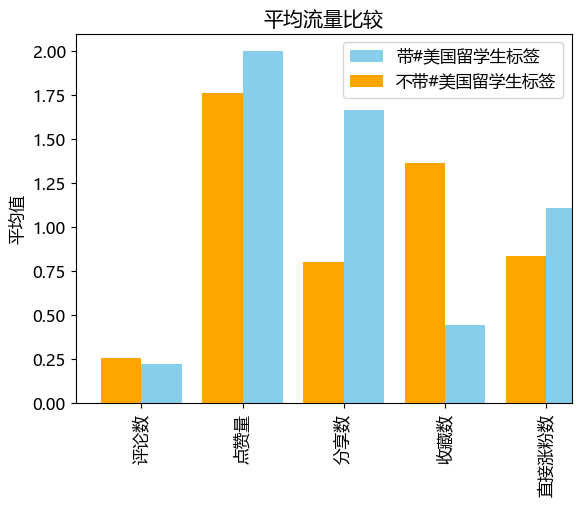

In [214]:
fig, ax = plt.subplots()
df1_t1_a_stats.plot(kind='bar', color='skyblue', position=0, width=0.4, label='带#美国留学生标签', ax=ax)
df1_t1_0_stats.plot(kind='bar', color='orange', position=1, width=0.4, label='不带#美国留学生标签', ax=ax)

# Set labels, title, and legend
plt.title('平均流量比较')
plt.ylabel('平均值')
plt.legend()

plt.show()

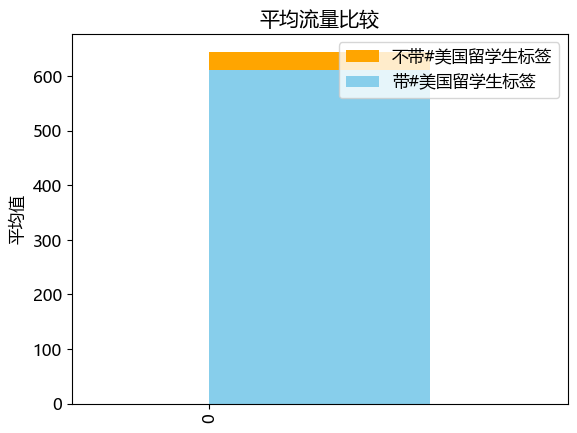

In [215]:
pd.Series(df1_t1_0_view).plot(kind='bar', color='orange', position=0, width=0.4, label='不带#美国留学生标签')
pd.Series(df1_t1_a_view).plot(kind='bar', color='skyblue', position=0, width=0.4, label='带#美国留学生标签')


plt.title('平均流量比较')
plt.ylabel('平均值')
plt.legend()
plt.show()

In [216]:
df1_t1_a['类别'].value_counts()

类别
线下交流会     4
直播通知      2
干货分享      1
报名截止日期    1
周三直播预告    1
Name: count, dtype: int64

In [217]:
df1_t1_0['类别'].value_counts()

类别
干货分享        15
经验分享         9
报名截止日期       8
课程宣传         8
线下交流会        4
课程直播预告       4
经验分享直播预告     4
直播通知         3
Name: count, dtype: int64

In [218]:
len(df1_t1_a)

9

In [219]:
len(df1_t1_0)

55

In [220]:
df1_a_m = df1_t1_a[df1_t1_a['类别'] == '线下交流会']
df1_0_m = df1_t1_0[df1_t1_0['类别'] == '线下交流会']

In [221]:
df1_a_m_stats = df1_a_m[['评论数','点赞量','分享数','收藏数','直接涨粉数']].mean()
df1_0_m_stats = df1_0_m[['评论数','点赞量','分享数','收藏数','直接涨粉数']].mean()

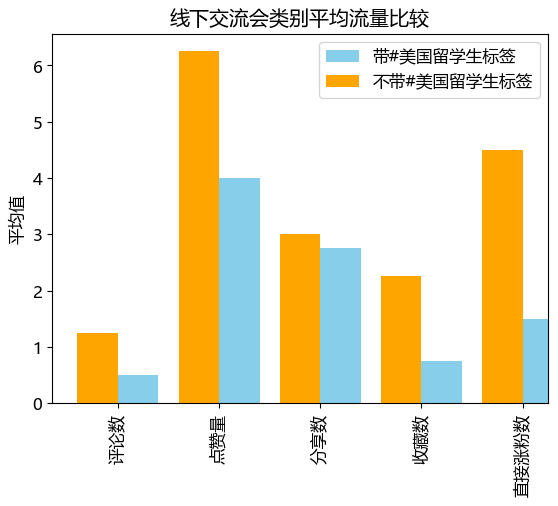

In [222]:
fig, ax = plt.subplots()
df1_a_m_stats.plot(kind='bar', color='skyblue', position=0, width=0.4, label='带#美国留学生标签', ax=ax)
df1_0_m_stats.plot(kind='bar', color='orange', position=1, width=0.4, label='不带#美国留学生标签', ax=ax)

# Set labels, title, and legend
plt.title('线下交流会类别平均流量比较')
plt.ylabel('平均值')
plt.legend()

plt.show()